In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


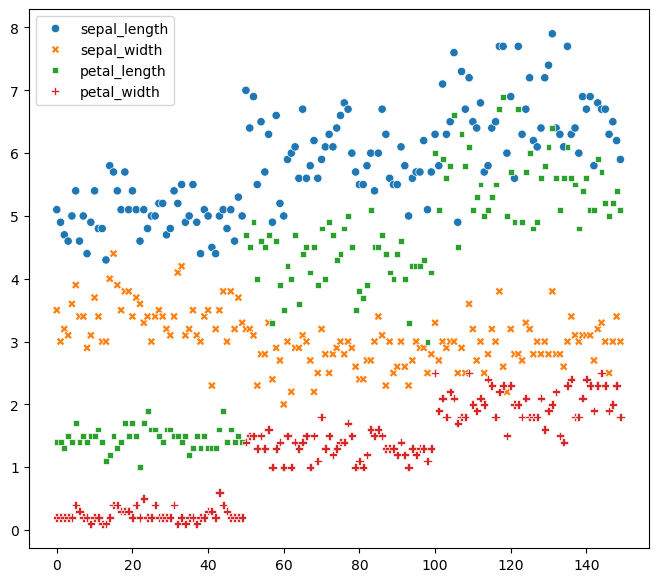

In [4]:
plt.figure(figsize=(8,7))
sns.scatterplot(data = df)
plt.show()

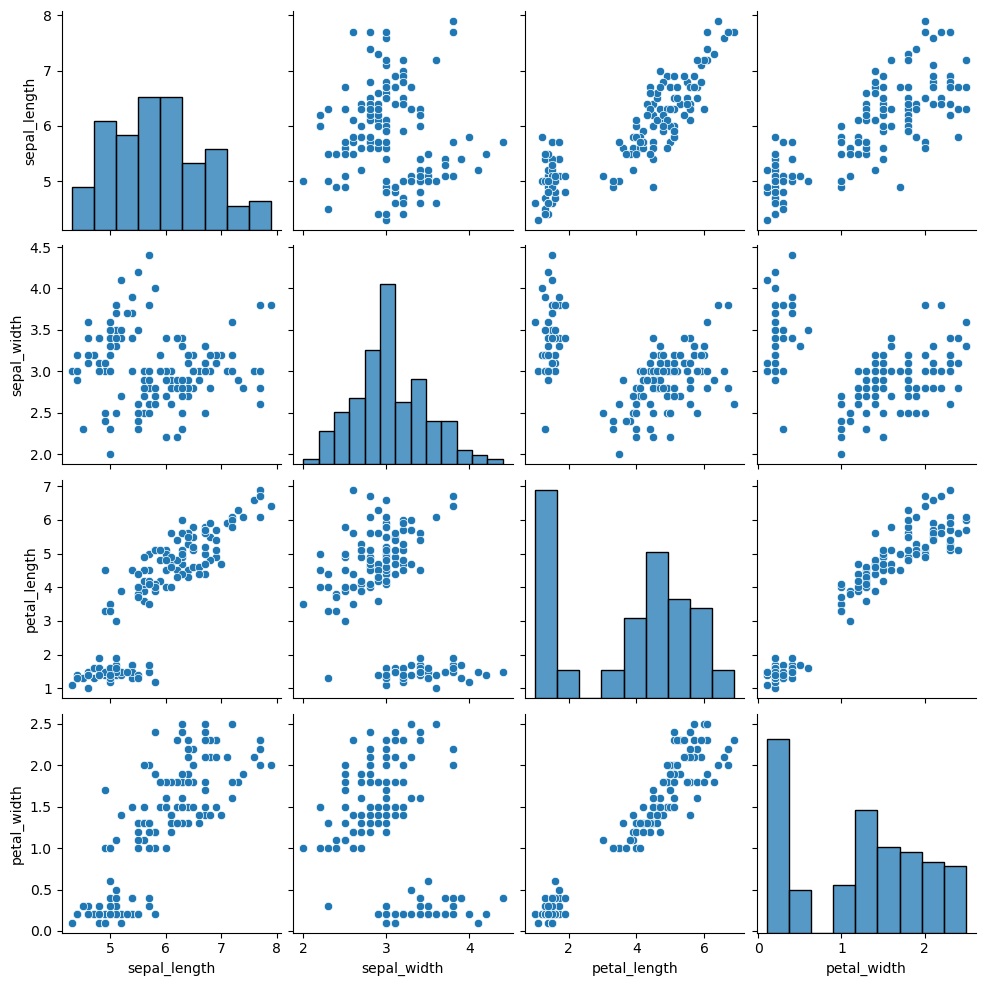

In [5]:
sns.pairplot(data = df)
plt.show()

# No. of K (Elbow method)

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []

for i in range(2, 21):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(df)
    wcss.append(km.inertia_)

C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

In [9]:
wcss 

[152.36870647733906,
 78.940841426146,
 57.47327326549492,
 50.071267888973765,
 38.94943484454353,
 37.51147575757577,
 33.11042314262314,
 29.084854660045835,
 27.38344766505636,
 25.58680894544053,
 23.376416835357624,
 22.865932523616735,
 21.011656052281054,
 21.247311786252972,
 18.9015202020202,
 17.397486568986572,
 16.975987179487177,
 16.27787878787879,
 15.200028443778447]

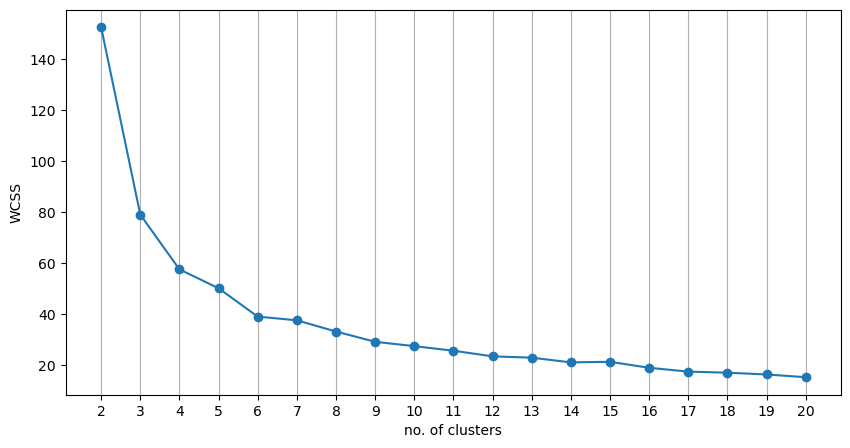

In [10]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2, 21)], wcss, marker="o")
plt.xlabel("no. of clusters")
plt.xticks([i for i in range(2, 21)])
plt.ylabel("WCSS")
plt.grid(axis="x")
plt.show()
#  here from point where elbow is the optimal no of clusters i.e. 3 here

# Clusters

In [12]:
kmn = KMeans(n_clusters=3)
df["species_predict"] = kmn.fit_predict(df)

C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


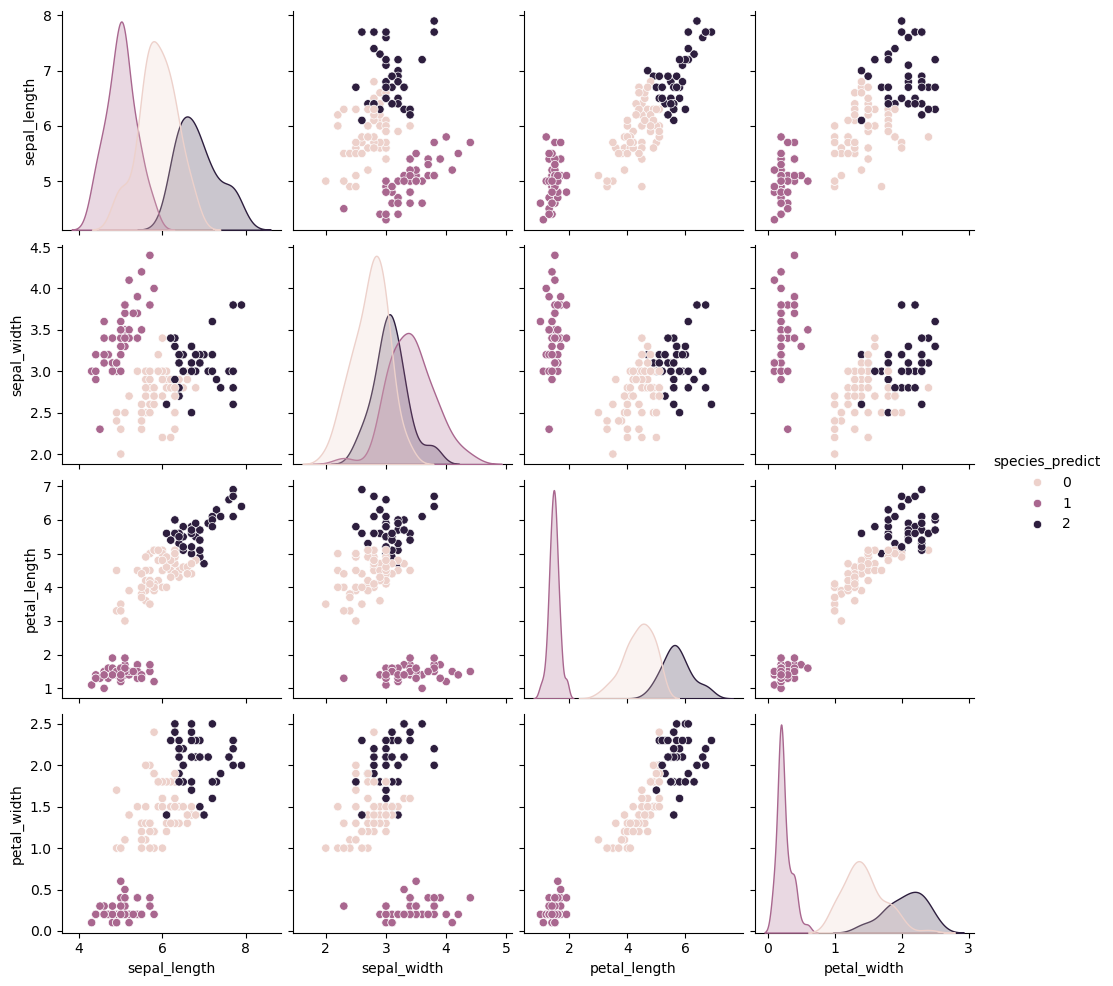

In [14]:
sns.pairplot(data=df, hue="species_predict")
plt.show()

# Silhouette Score

In [45]:
from sklearn.metrics import silhouette_score

In [47]:
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [63]:
sc = silhouette_score(df, labels=kmn.labels_)

In [65]:
ss = []
no_clusters = [i for j in range(2, 21)]
for i in range(2, 21):
    km1 = KMeans(n_clusters=i)
    km1.fit(df)
    ss.append(silhouette_score(df, labels=kmn.labels_))
    

C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PALLAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

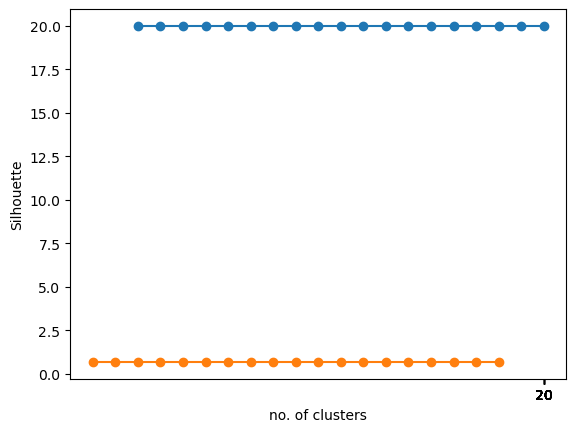

In [69]:
plt.plot([i for i in range(2, 21)],no_clusters,ss, marker='o')
plt.xlabel("no. of clusters")
plt.ylabel("Silhouette")
plt.xticks(no_clusters)
plt.show()